# Marketing Mix Modeling & AdStock

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import statsmodels.tsa as tsa 
import statsmodels.formula.api as smf
import numpy as np


C:\Users\Rohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Rohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('Adstock_TV_Radio_Sales.csv')
df

,Base_Sales,TV_Sales1,Temprature,TV_Spend,Week,TV_Sales1_AdStock,TV_Sales2,TV_Radio_Sales1,TV_Radio_Sales2,Radio_Spend,TV_Sales2_Adstock,TV_Radio_Sales1_Adstock,TV_Radio_Sales2_Adstock
0,999.420481,999.420481,1.204759,0,1,0.000000e+00,1003.276688,1008.322089,1007.485460,0,0.0,0.000000e+00,0.0
1,1016.029389,1016.029389,2.391967,0,2,0.000000e+00,1008.322283,1004.325565,1005.948293,0,0.0,0.000000e+00,0.0
2,1020.880747,1020.880747,3.544331,0,3,0.000000e+00,1011.757184,1019.312032,1018.708342,0,0.0,0.000000e+00,0.0
3,1020.230930,1020.230930,4.645062,0,4,0.000000e+00,1020.124702,1023.269288,1016.475639,0,0.0,0.000000e+00,0.0
4,1031.258145,1031.258145,5.678127,0,5,0.000000e+00,1038.014845,1030.450885,1021.601069,0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1182.811882,1182.811934,-4.785508,0,256,1.760000e-06,1183.794947,1191.400437,1178.636471,0,0.0,1.760000e-06,0.0
256,1191.700526,1191.700542,-3.692801,0,257,5.270000e-07,1180.486558,1193.942227,1195.392130,0,0.0,5.270000e-07,0.0
257,1187.976077,1187.976081,-2.546299,0,258,1.580000e-07,1193.551833,1195.002871,1191.653565,0,0.0,1.580000e-07,0.0
258,1196.694780,1196.694782,-1.362705,0,259,4.750000e-08,1207.741175,1200.338502,1204.931193,0,0.0,4.750000e-08,0.0


## Univariate Analysis

We will do Univarite Analysis first followed by MultiVariate Analysis to see how the Distribution of each Variable is and how they are affecting each other

In [3]:
df.describe()

,Base_Sales,TV_Sales1,Temprature,TV_Spend,Week,TV_Sales1_AdStock,TV_Sales2,TV_Radio_Sales1,TV_Radio_Sales2,Radio_Spend,TV_Sales2_Adstock,TV_Radio_Sales1_Adstock,TV_Radio_Sales2_Adstock
count,260.000000,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000
mean,1103.183169,1107.645536,-0.000266,22.384615,130.500000,1.487456e-01,1107.220512,1109.365433,1108.083439,6.923077,0.123619,1.487456e-01,0.123619
std,61.771037,63.228362,7.086496,65.710302,75.199734,3.391669e-01,63.501734,63.489458,63.230583,24.188646,0.286756,3.391669e-01,0.286756
min,989.349865,989.349869,-9.999971,0.000000,1.000000,0.000000e+00,984.779929,985.485778,984.240540,0.000000,0.000000,0.000000e+00,0.000000
25%,1050.225179,1052.074632,-6.906760,0.000000,65.750000,1.438750e-15,1051.194122,1054.641713,1051.728120,0.000000,0.000000,1.438750e-15,0.000000
50%,1104.208308,1112.066538,-0.007963,0.000000,130.500000,4.770000e-08,1110.965899,1114.084764,1113.075830,0.000000,0.000000,4.770000e-08,0.000000
75%,1155.743736,1162.311119,6.900619,0.000000,195.250000,5.686842e-03,1163.799559,1165.555626,1162.206357,0.000000,0.000000,5.686842e-03,0.000000
max,1222.175074,1242.885508,9.999997,500.000000,260.000000,1.235918e+00,1236.656651,1241.497501,1238.202603,100.000000,0.993262,1.235918e+00,0.993262


In [4]:

%matplotlib inline 



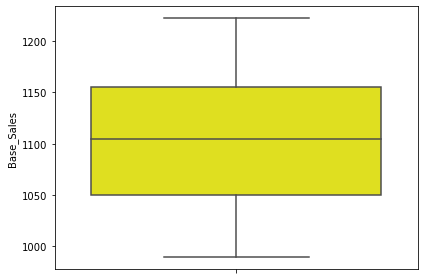

In [5]:

sns.boxplot(y=df['Base_Sales'],color='Yellow')
plt.tight_layout()

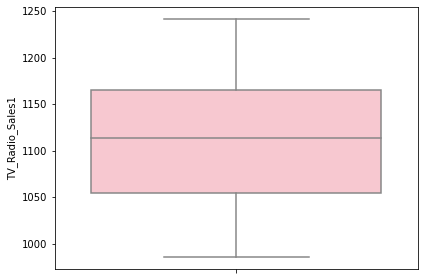

In [6]:

sns.boxplot(y=df['TV_Radio_Sales1'],color='Pink')
plt.tight_layout()

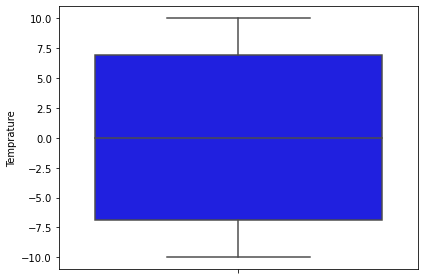

In [7]:

sns.boxplot(y=df['Temprature'],color='Blue')

plt.tight_layout()

Plot some Distribution & Histogram Plots

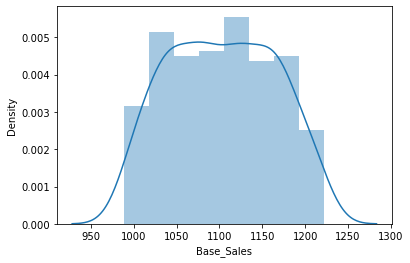

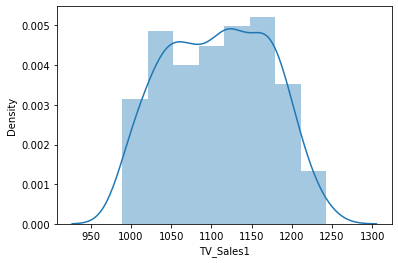

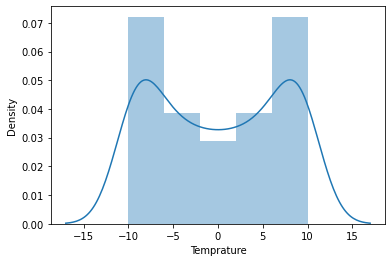

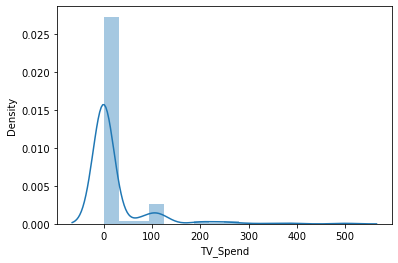

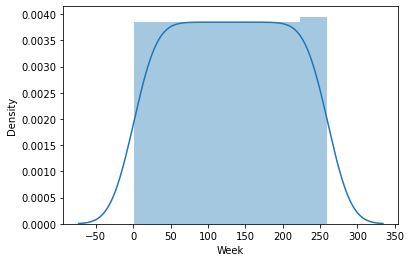

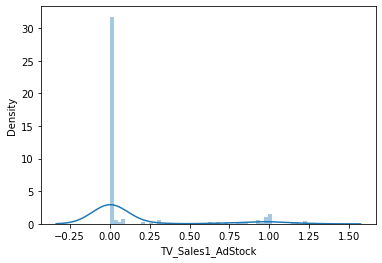

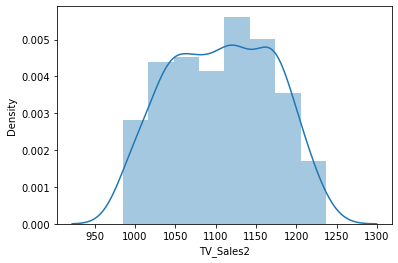

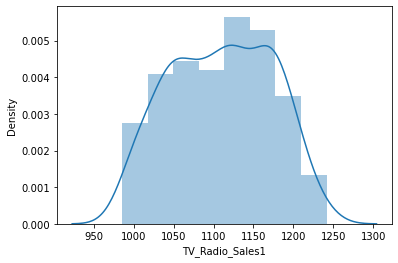

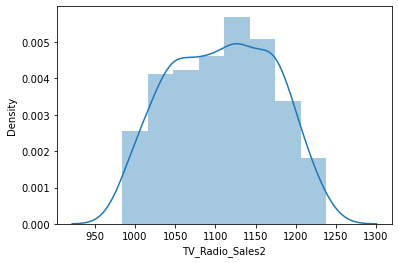

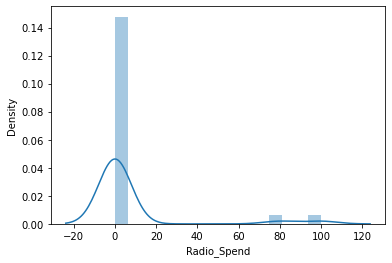

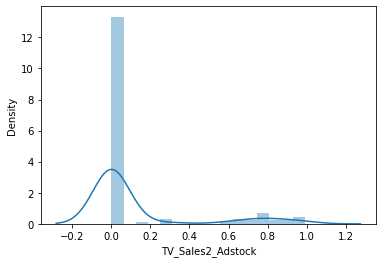

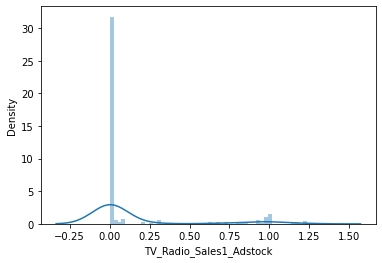

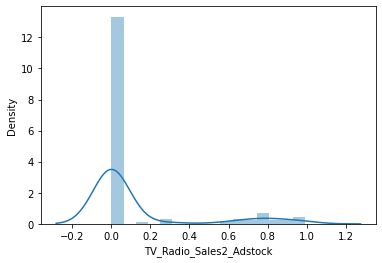

In [8]:

warnings.filterwarnings('ignore')

for index, column in enumerate(df.columns):
    plt.figure(index)
    sns.distplot(df[column])
    


array([[<AxesSubplot:title={'center':'Base_Sales'}>,
        <AxesSubplot:title={'center':'TV_Sales1'}>,
        <AxesSubplot:title={'center':'Temprature'}>,
        <AxesSubplot:title={'center':'TV_Spend'}>],
       [<AxesSubplot:title={'center':'Week'}>,
        <AxesSubplot:title={'center':'TV_Sales1_AdStock'}>,
        <AxesSubplot:title={'center':'TV_Sales2'}>,
        <AxesSubplot:title={'center':'TV_Radio_Sales1'}>],
       [<AxesSubplot:title={'center':'TV_Radio_Sales2'}>,
        <AxesSubplot:title={'center':'Radio_Spend'}>,
        <AxesSubplot:title={'center':'TV_Sales2_Adstock'}>,
        <AxesSubplot:title={'center':'TV_Radio_Sales1_Adstock'}>],
       [<AxesSubplot:title={'center':'TV_Radio_Sales2_Adstock'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

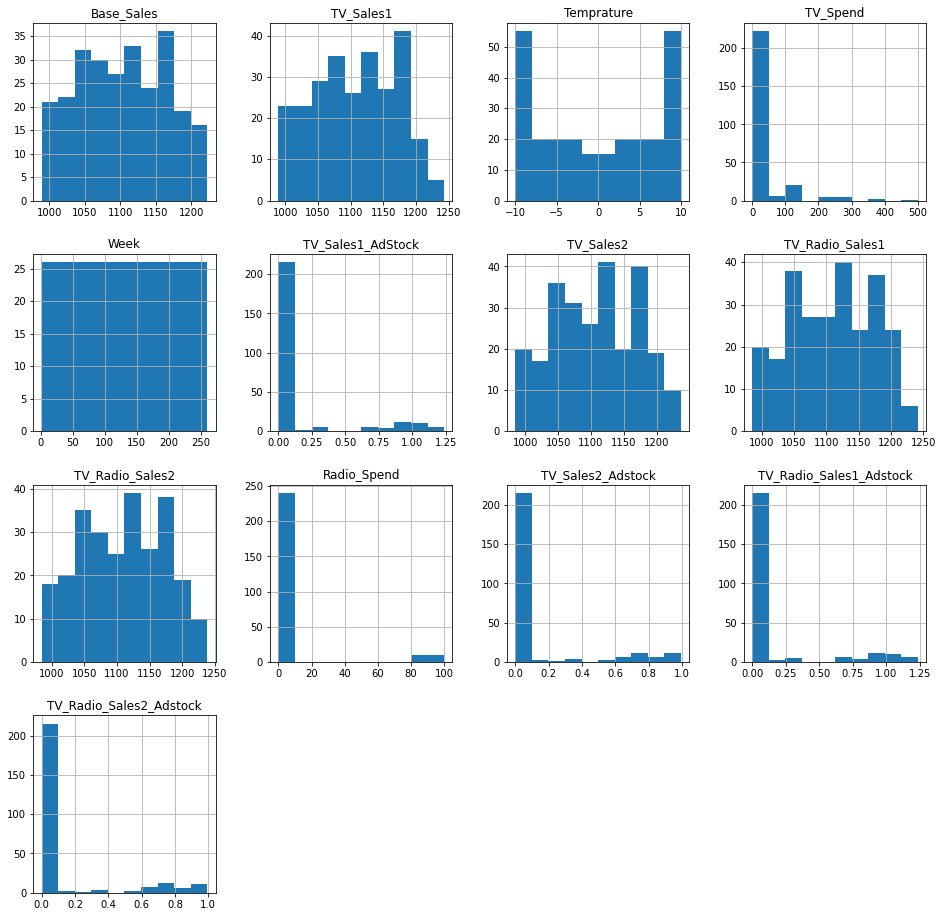

In [9]:
df.hist(column=df.columns, figsize = (16,16))

## Bivariate & Multivariate Analysis 

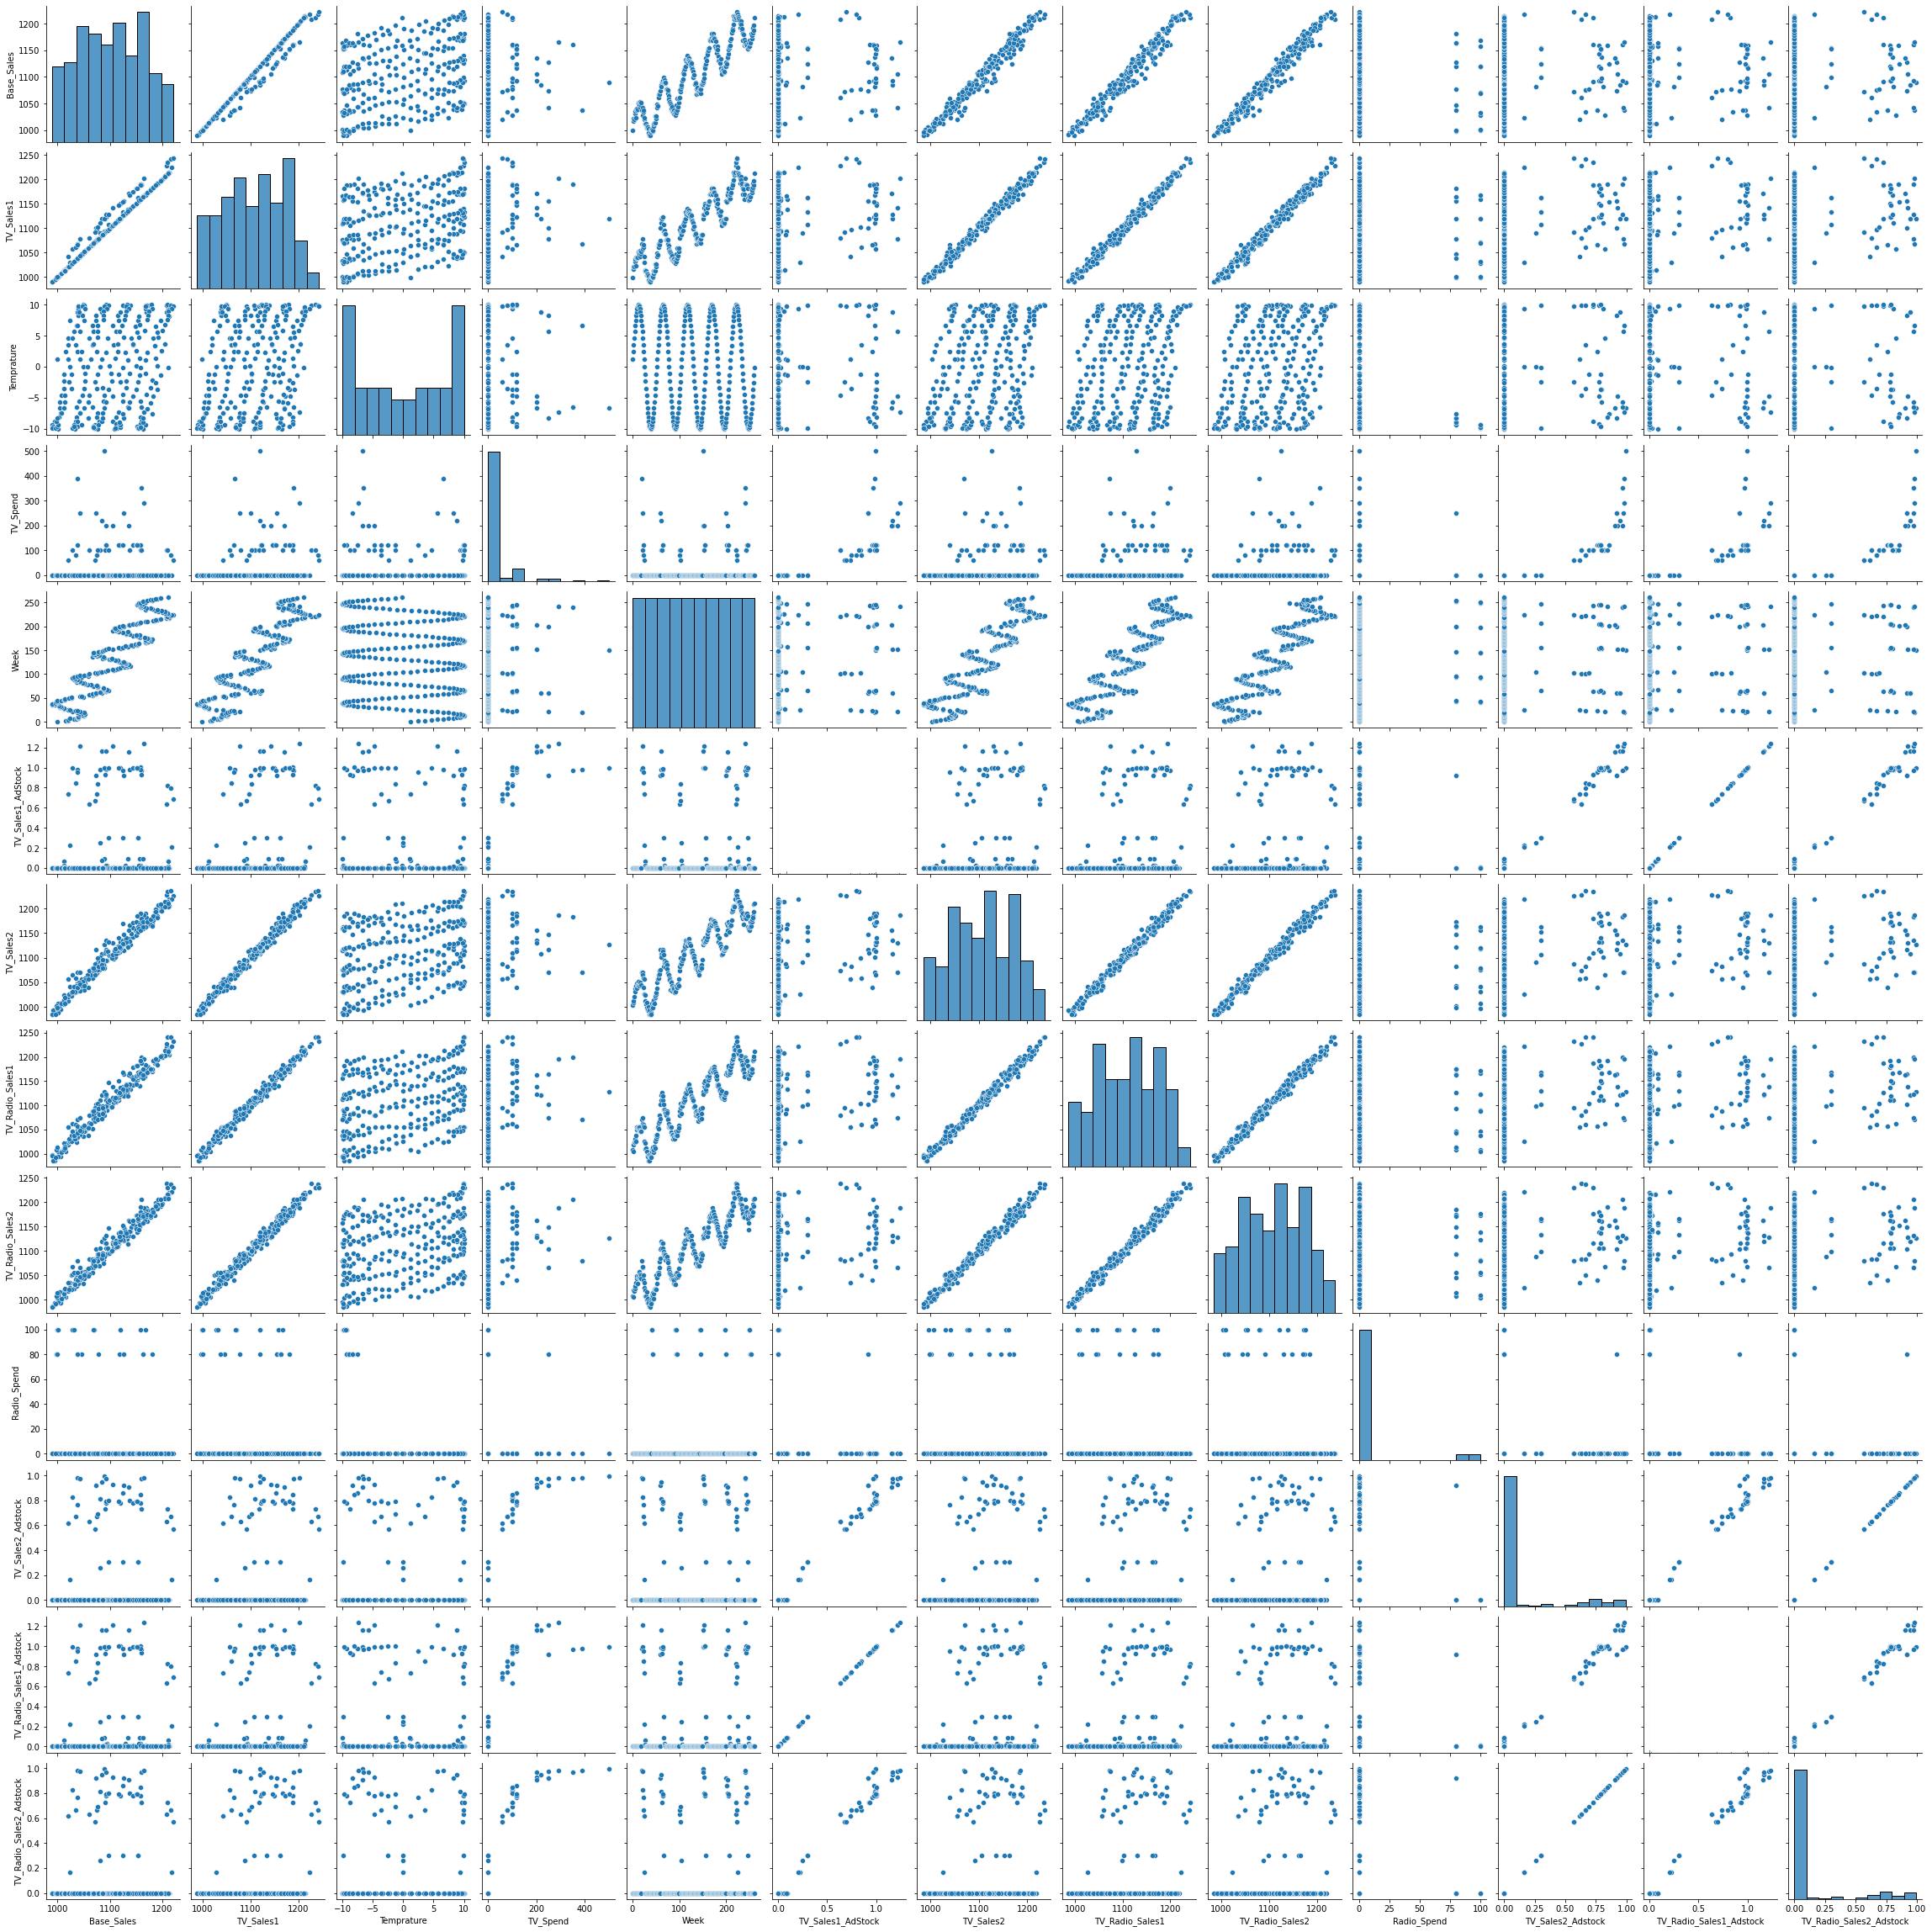

In [10]:
sns.pairplot(df)

We can see how the 3 Sales are related to each other and how Sales are increasing in a Spiral fashion over the weeks.
See the changes of Sales with Temperature which suggests Seasonality. 

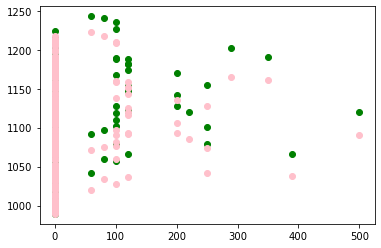

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(df['TV_Spend'], df['TV_Sales1'] , color='green')
plt.scatter(df['TV_Spend'], df['Base_Sales'] , color='pink')

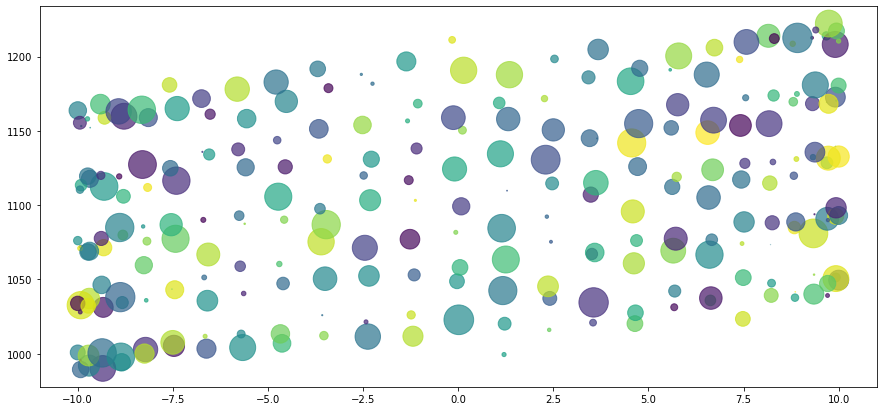

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
N = len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2 

plt.scatter(df['Temprature'], df['Base_Sales'], s=area, c=colors, alpha=0.7, cmap='viridis')

plt.show()

<AxesSubplot:xlabel='Week'>

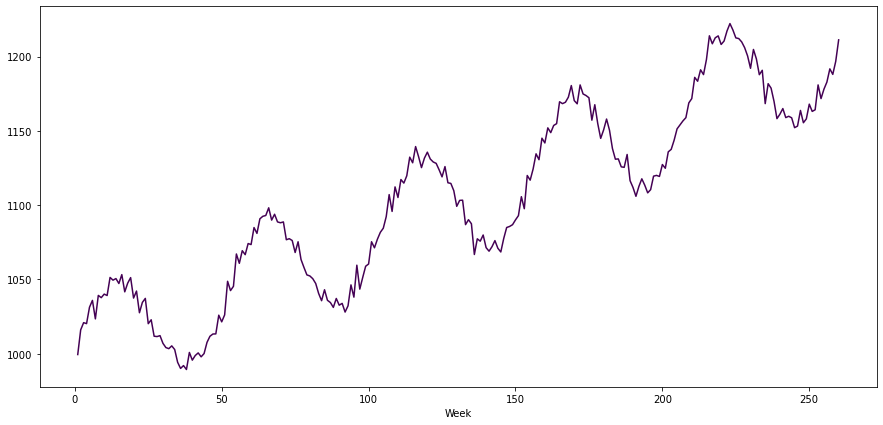

In [13]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).Base_Sales.sum().plot(ax=ax, cmap='viridis')

Text(0, 0.5, 'Sales')

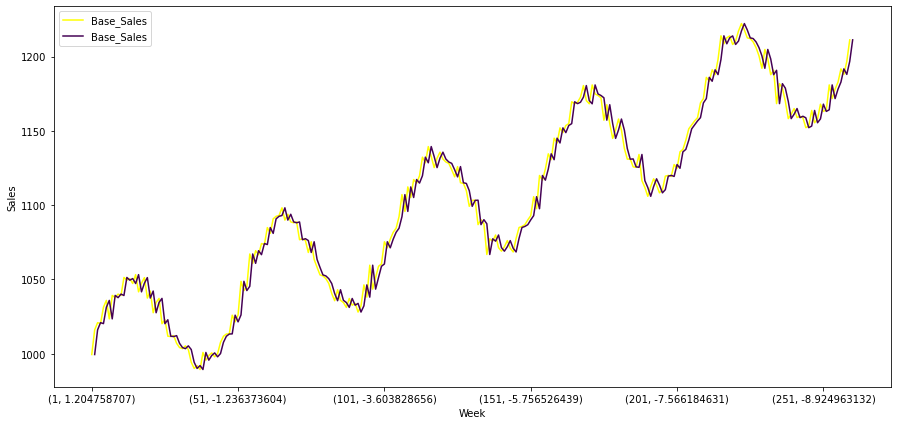

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week','Temprature']).Base_Sales.sum().plot(ax=ax, color='yellow')
df.groupby(['Week']).Base_Sales.sum().plot(ax=ax, cmap='viridis')
plt.legend()
plt.ylabel('Sales')

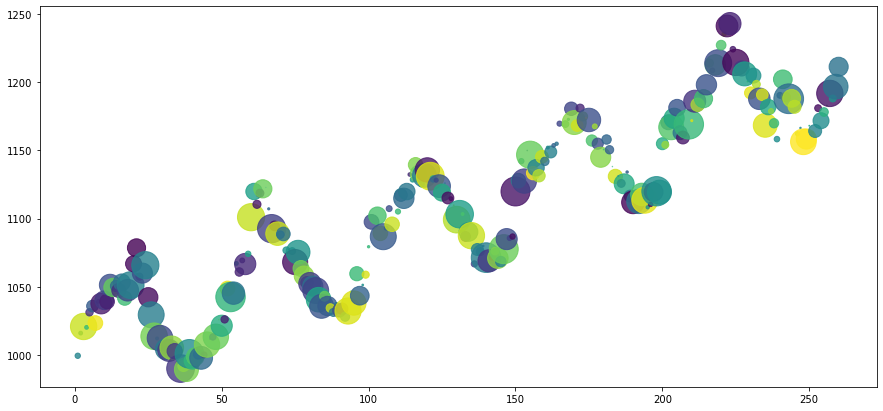

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
N = len(df)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2 

plt.scatter(df['Week'], df['TV_Sales1'], s=area, c=colors, alpha=0.8, cmap='viridis')

plt.show()

In [16]:
df.groupby(['Week']).TV_Sales1.sum()

Week
1       999.420481
2      1016.029389
3      1020.880747
4      1020.230930
5      1031.258145
          ...     
256    1182.811934
257    1191.700542
258    1187.976081
259    1196.694782
260    1211.215776
Name: TV_Sales1, Length: 260, dtype: float64

Text(0, 0.5, 'Sales')

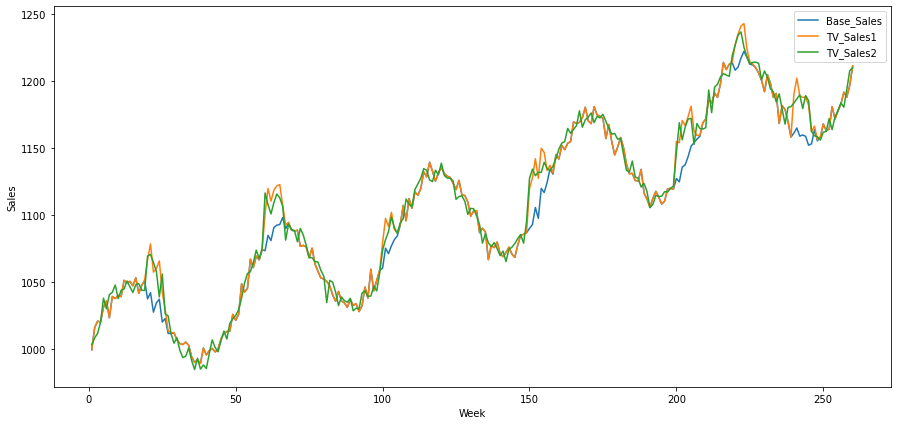

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).Base_Sales.sum().plot(ax=ax)
df.groupby(['Week']).TV_Sales1.sum().plot(ax=ax)
df.groupby(['Week']).TV_Sales2.sum().plot(ax=ax)
#df.groupby(['Week']).TV_Radio_Sales1.sum().plot(ax=ax)
#df.groupby(['Week']).TV_Radio_Sales2.sum().plot(ax=ax)
plt.legend()
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

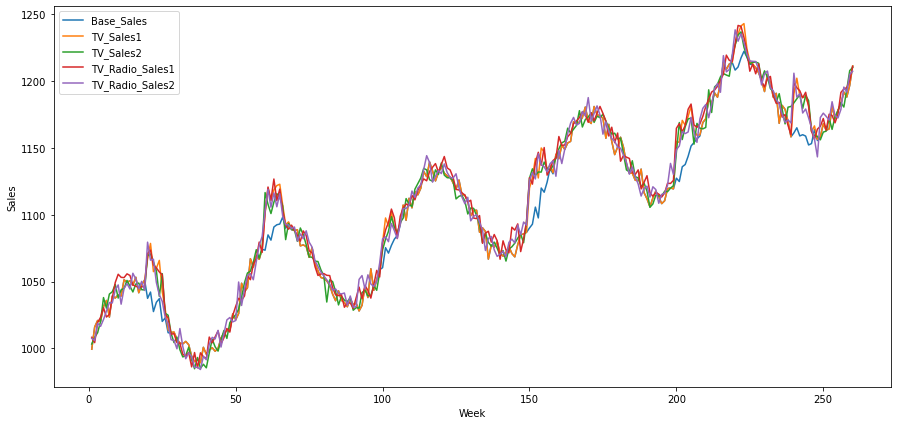

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).Base_Sales.sum().plot(ax=ax)
df.groupby(['Week']).TV_Sales1.sum().plot(ax=ax)
df.groupby(['Week']).TV_Sales2.sum().plot(ax=ax)
df.groupby(['Week']).TV_Radio_Sales1.sum().plot(ax=ax)
df.groupby(['Week']).TV_Radio_Sales2.sum().plot(ax=ax)
plt.legend()
plt.ylabel('Sales')

Text(0, 0.5, 'Advertising Spend')

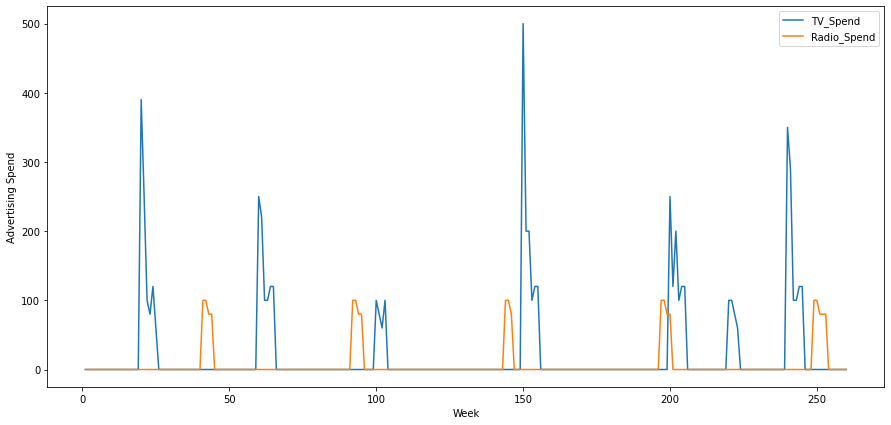

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).TV_Spend.sum().plot(ax=ax)
df.groupby(['Week']).Radio_Spend.sum().plot(ax=ax)
plt.legend()
plt.ylabel('Advertising Spend')

### Lets Compare the Adstock Contributions for TV Sales1 and TV Sales 2. 

We see that the adstock values are higher for Model 1 for TV Advertising. Also, The Adstock values for Model 2 diminishes to 0 as soon as the Spending is stopped. Whereas for Model 1 they diminishes close to 0 but never zero. 

Text(0, 0.5, 'Adstock')

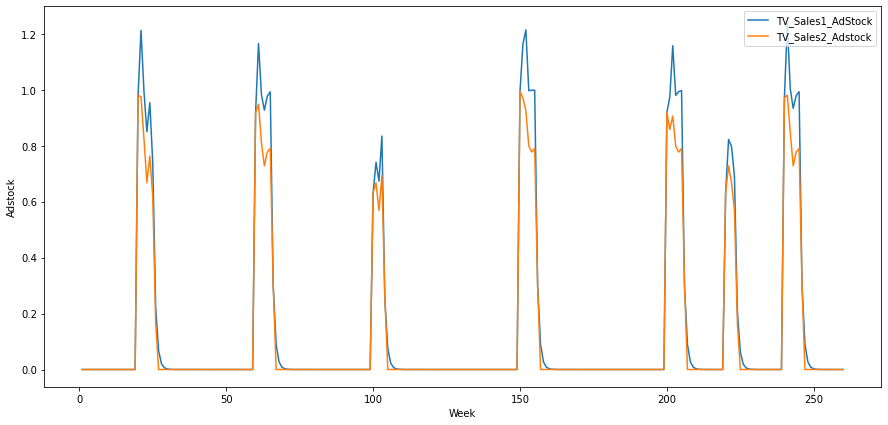

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).TV_Sales1_AdStock.sum().plot(ax=ax)
df.groupby(['Week']).TV_Sales2_Adstock.sum().plot(ax=ax)
plt.legend()
plt.ylabel('Adstock')

Text(0, 0.5, 'Adstock')

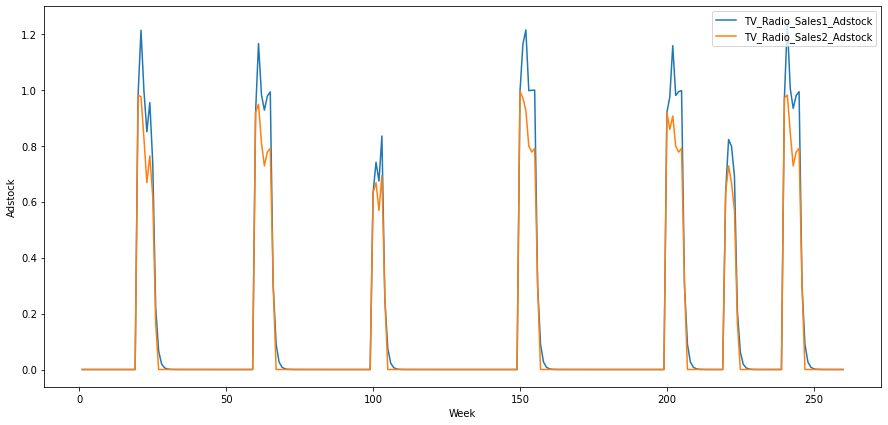

In [21]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).TV_Radio_Sales1_Adstock.sum().plot(ax=ax)
df.groupby(['Week']).TV_Radio_Sales2_Adstock.sum().plot(ax=ax)

plt.legend()
plt.ylabel('Adstock')

Text(0, 0.5, 'Adstock')

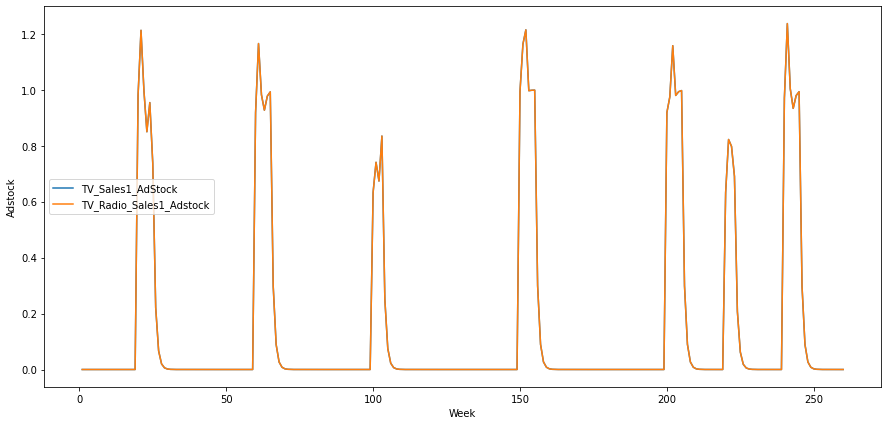

In [22]:
#plot in dashboard to see which weeks we have spending and adstocks
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).TV_Sales1_AdStock.sum().plot(ax=ax)
df.groupby(['Week']).TV_Radio_Sales1_Adstock.sum().plot(ax=ax)
plt.legend()
plt.ylabel('Adstock')

Text(0, 0.5, 'Sales')

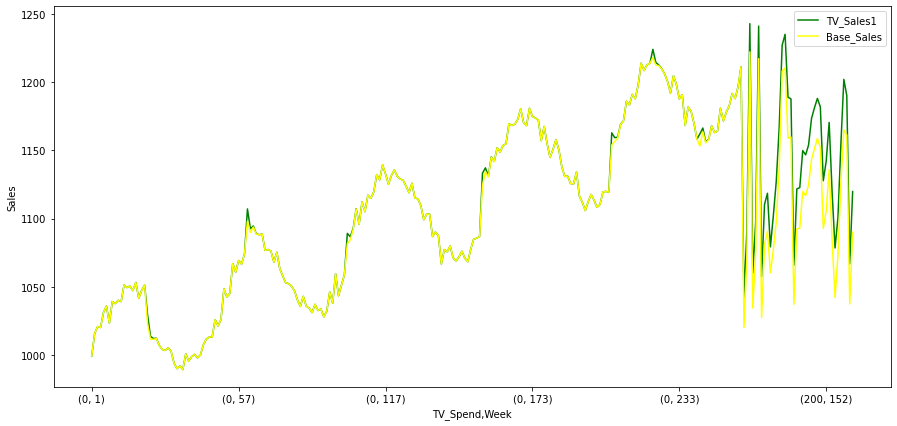

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['TV_Spend','Week']).TV_Sales1.sum().plot(ax=ax, color='green')
df.groupby(['TV_Spend','Week']).Base_Sales.sum().plot(ax=ax, color='yellow')
plt.legend()
plt.ylabel('Sales')

You can observe from the above plot that for the weeks where the TV Spending is 0, Base sales and TV Sales are equal. But TV Sales see a boost when TV Spend is there. That suggests that TV Ads do have an effect on Sales. 

Text(0, 0.5, 'Sales')

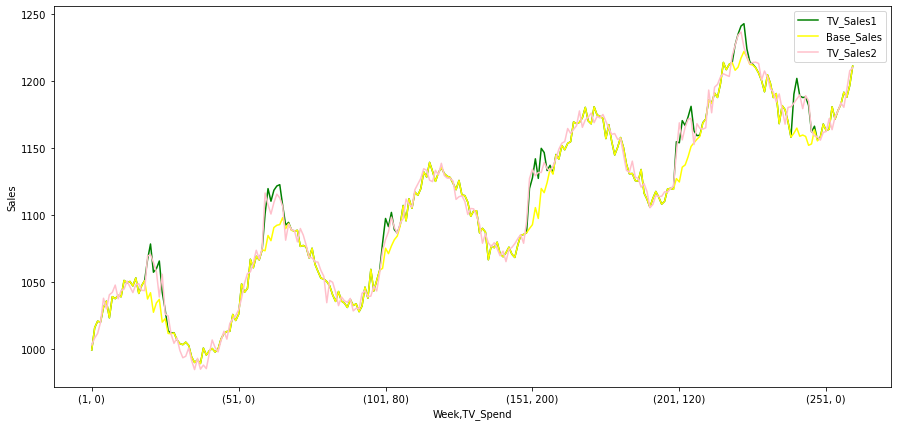

In [24]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week','TV_Spend']).TV_Sales1.sum().plot(ax=ax, color='green')
df.groupby(['Week','TV_Spend']).Base_Sales.sum().plot(ax=ax, color='yellow')
df.groupby(['Week','TV_Spend']).TV_Sales2.sum().plot(ax=ax, color='pink')
plt.legend()
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

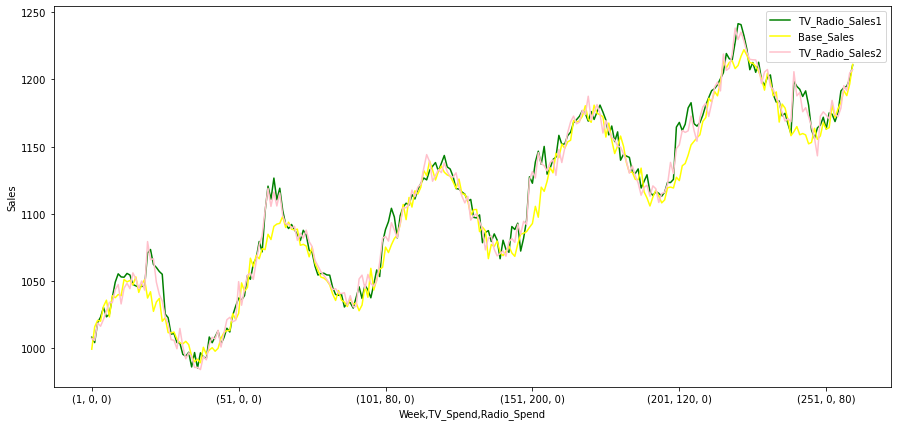

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week','TV_Spend','Radio_Spend']).TV_Radio_Sales1.sum().plot(ax=ax, color='green')
df.groupby(['Week','TV_Spend','Radio_Spend']).Base_Sales.sum().plot(ax=ax, color='yellow')
df.groupby(['Week','TV_Spend','Radio_Spend']).TV_Radio_Sales2.sum().plot(ax=ax, color='pink')
plt.legend()
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

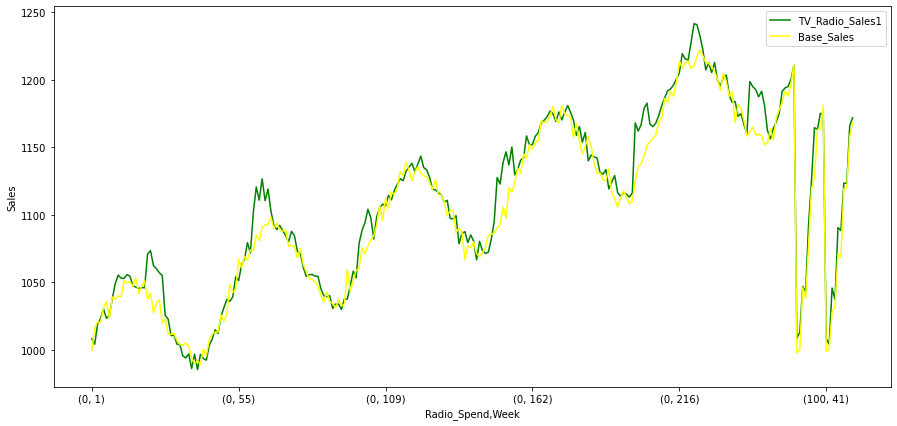

In [26]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Radio_Spend','Week']).TV_Radio_Sales1.sum().plot(ax=ax, color='green')
#df.groupby(['Radio_Spend','Week']).TV_Radio_Sales2.sum().plot(ax=ax)
df.groupby(['Radio_Spend','Week']).Base_Sales.sum().plot(ax=ax, color='yellow')
plt.legend()
plt.ylabel('Sales')

In the above graph, we can see that for the period where the TV Spend is there & Radio Spend is 0,
the Sales are higher than Base sales for that period. 

But in the last part of the graph where the Radio Spend is there, there is no increase.

Text(0, 0.5, 'Sales')

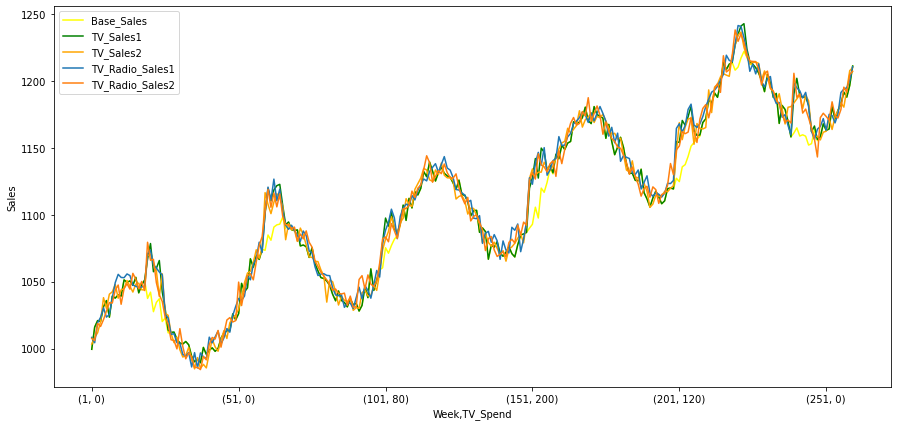

In [27]:
fig, ax = plt.subplots(figsize=(15,7))
#df.groupby(['tvSpend','week']).tvSales1.sum().plot(ax=ax, colors='green')
#df.groupby(['tvSpend','week']).baseSales.sum().plot(ax=ax, colors='yellow')
df.groupby(['Week','TV_Spend']).Base_Sales.sum().plot(ax=ax, color='Yellow')
df.groupby(['Week','TV_Spend']).TV_Sales1.sum().plot(ax=ax, color='green')
df.groupby(['Week','TV_Spend']).TV_Sales2.sum().plot(ax=ax, color='orange')
df.groupby(['Week','TV_Spend']).TV_Radio_Sales1.sum().plot(ax=ax)
df.groupby(['Week','TV_Spend']).TV_Radio_Sales2.sum().plot(ax=ax)

plt.legend()
plt.ylabel('Sales')

Lets Calculate the Difference between Different Sales and Adstocks

In [28]:
df['TVRadio_Sales1_Diff'] = df['TV_Radio_Sales1'] - df['TV_Sales1']
df['TV_Sales_Diff'] = df['TV_Sales1'] - df['TV_Sales2']
df['TV_Adstock1_Diff'] = df['TV_Sales1_AdStock'] - df['TV_Sales2_Adstock']
df['TVRadio_Adstock1_Diff'] = df['TV_Radio_Sales1_Adstock'] - df['TV_Radio_Sales2_Adstock']

In [29]:
df['Week_M'] = df['Week']

In [30]:
df.head(50)

,Base_Sales,TV_Sales1,Temprature,TV_Spend,Week,TV_Sales1_AdStock,TV_Sales2,TV_Radio_Sales1,TV_Radio_Sales2,Radio_Spend,TV_Sales2_Adstock,TV_Radio_Sales1_Adstock,TV_Radio_Sales2_Adstock,TVRadio_Sales1_Diff,TV_Sales_Diff,TV_Adstock1_Diff,TVRadio_Adstock1_Diff,Week_M
0,999.420481,999.420481,1.204759,0,1,0.000000e+00,1003.276688,1008.322089,1007.485460,0,0.000000,0.000000e+00,0.000000,8.901608,-3.856207,0.000000e+00,0.000000e+00,1
1,1016.029389,1016.029389,2.391967,0,2,0.000000e+00,1008.322283,1004.325565,1005.948293,0,0.000000,0.000000e+00,0.000000,-11.703824,7.707106,0.000000e+00,0.000000e+00,2
2,1020.880747,1020.880747,3.544331,0,3,0.000000e+00,1011.757184,1019.312032,1018.708342,0,0.000000,0.000000e+00,0.000000,-1.568715,9.123563,0.000000e+00,0.000000e+00,3
3,1020.230930,1020.230930,4.645062,0,4,0.000000e+00,1020.124702,1023.269288,1016.475639,0,0.000000,0.000000e+00,0.000000,3.038358,0.106228,0.000000e+00,0.000000e+00,4
4,1031.258145,1031.258145,5.678127,0,5,0.000000e+00,1038.014845,1030.450885,1021.601069,0,0.000000,0.000000e+00,0.000000,-0.807260,-6.756700,0.000000e+00,0.000000e+00,5
5,1035.860920,1035.860920,6.628475,0,6,0.000000e+00,1030.068353,1023.482957,1027.972544,0,0.000000,0.000000e+00,0.000000,-12.377963,5.792567,0.000000e+00,0.000000e+00,6
6,1023.420289,1023.420289,7.482263,0,7,0.000000e+00,1040.622455,1025.405121,1034.275464,0,0.000000,0.000000e+00,0.000000,1.984832,-17.202166,0.000000e+00,0.000000e+00,7
7,1039.223939,1039.223939,8.227054,0,8,0.000000e+00,1042.386237,1037.906887,1034.032650,0,0.000000,0.000000e+00,0.000000,-1.317052,-3.162298,0.000000e+00,0.000000e+00,8
8,1037.703225,1037.703225,8.851997,0,9,0.000000e+00,1047.842684,1049.281201,1043.663026,0,0.000000,0.000000e+00,0.000000,11.577976,-10.139459,0.000000e+00,0.000000e+00,9
9,1040.094621,1040.094621,9.347989,0,10,0.000000e+00,1037.648762,1055.472868,1047.481966,0,0.000000,0.000000e+00,0.000000,15.378247,2.445859,0.000000e+00,0.000000e+00,10


In [31]:
df.to_csv('MMM_Adstock_TV_Radio_Modeling.csv')

<AxesSubplot:xlabel='Week'>

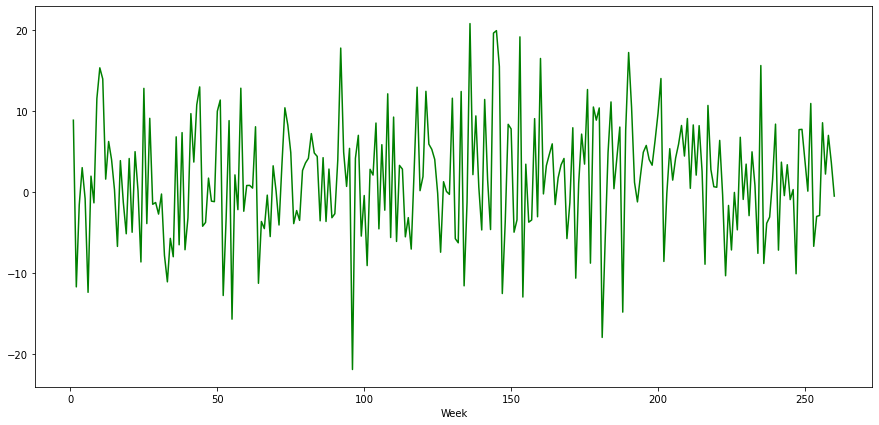

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).TVRadio_Sales1_Diff.sum().plot(ax=ax, color='green')

<AxesSubplot:xlabel='Week'>

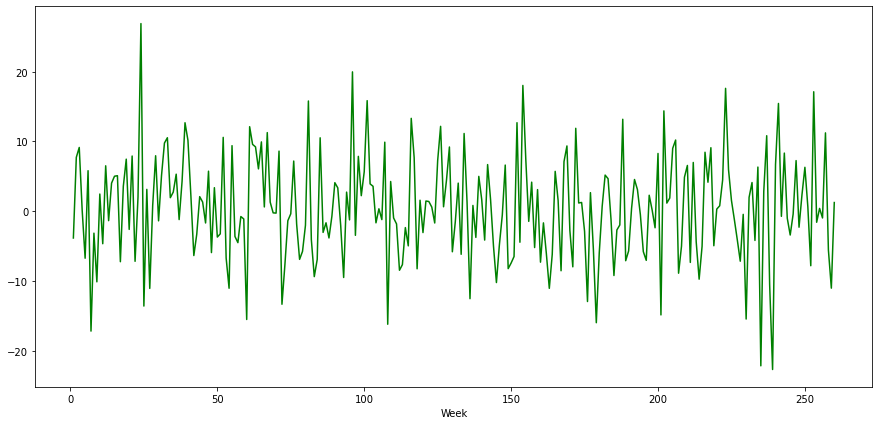

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).TV_Sales_Diff.sum().plot(ax=ax, color='green')

<AxesSubplot:xlabel='Week'>

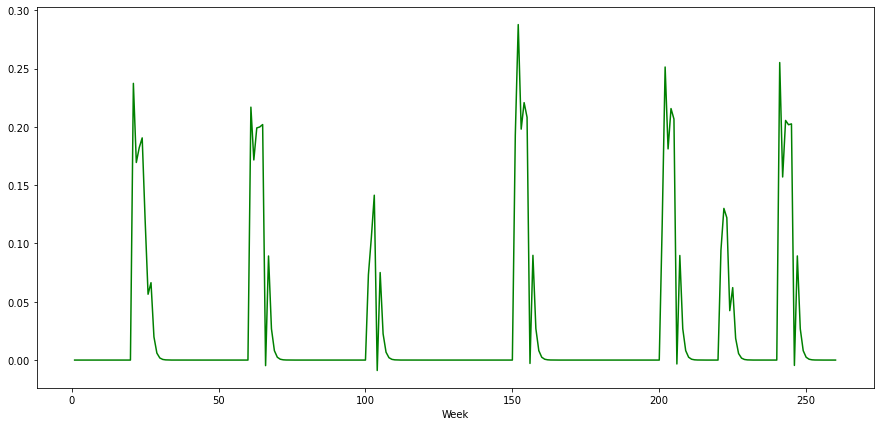

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week']).TV_Adstock1_Diff.sum().plot(ax=ax, color='green')

Text(0, 0.5, 'Adstock')

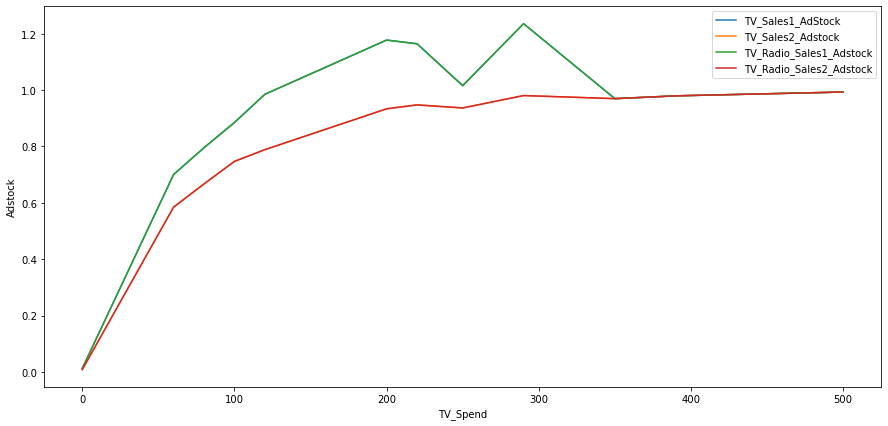

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['TV_Spend']).TV_Sales1_AdStock.mean().plot(ax=ax)
df.groupby(['TV_Spend']).TV_Sales2_Adstock.mean().plot(ax=ax)
df.groupby(['TV_Spend']).TV_Radio_Sales1_Adstock.mean().plot(ax=ax)
df.groupby(['TV_Spend']).TV_Radio_Sales2_Adstock.mean().plot(ax=ax)

plt.legend()
plt.ylabel('Adstock')

AdStock Values increase with the increase in TV spend upto a certain point called Saturation Point as evident from the graph. 

Text(0, 0.5, 'Adstock')

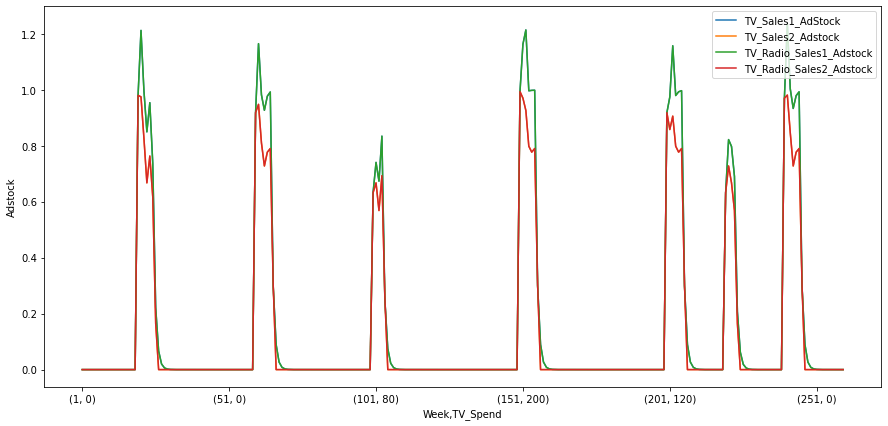

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week','TV_Spend']).TV_Sales1_AdStock.sum().plot(ax=ax)
df.groupby(['Week','TV_Spend']).TV_Sales2_Adstock.sum().plot(ax=ax)
df.groupby(['Week','TV_Spend']).TV_Radio_Sales1_Adstock.sum().plot(ax=ax)
df.groupby(['Week','TV_Spend']).TV_Radio_Sales2_Adstock.sum().plot(ax=ax)

plt.legend()
plt.ylabel('Adstock')

Model 1 behaves closely like a Ridge Regression where it diminshes near 0 but never 0. Model 2 Behaves more like a Lasso Regression where it immediately becomes 0 as soon as TV Spend

Text(0, 0.5, 'Adstock')

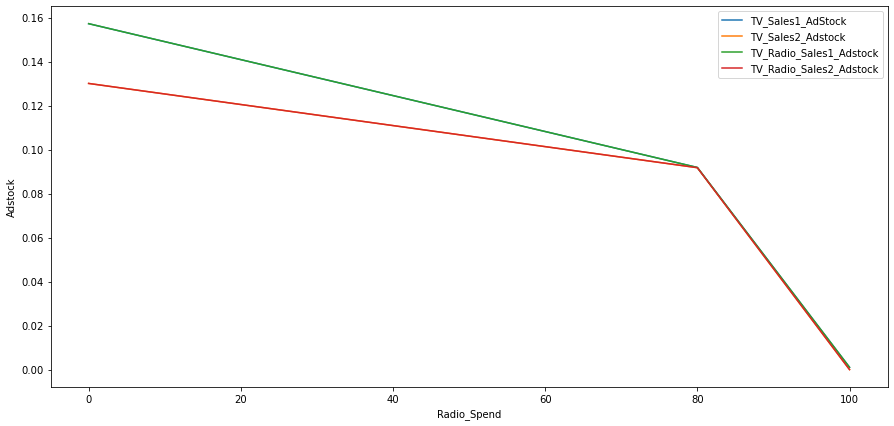

In [37]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Radio_Spend']).TV_Sales1_AdStock.mean().plot(ax=ax)
df.groupby(['Radio_Spend']).TV_Sales2_Adstock.mean().plot(ax=ax)
df.groupby(['Radio_Spend']).TV_Radio_Sales1_Adstock.mean().plot(ax=ax)
df.groupby(['Radio_Spend']).TV_Radio_Sales2_Adstock.mean().plot(ax=ax)

plt.legend()
plt.ylabel('Adstock')

Text(0, 0.5, 'Adstock')

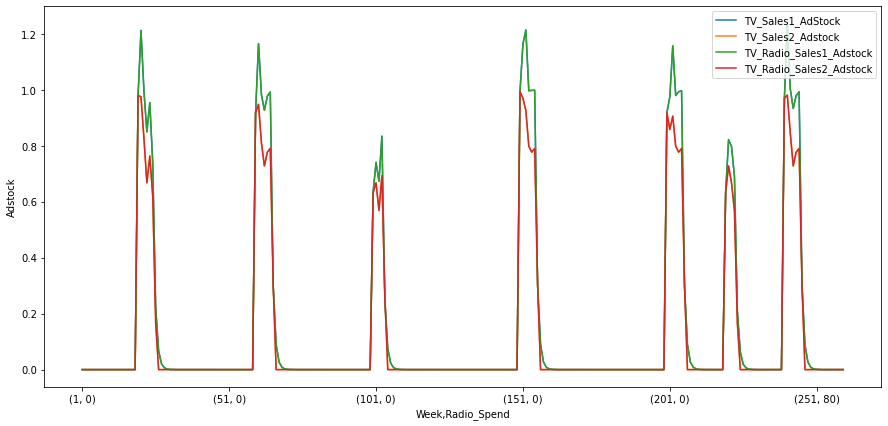

In [38]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Week','Radio_Spend']).TV_Sales1_AdStock.sum().plot(ax=ax)
df.groupby(['Week','Radio_Spend']).TV_Sales2_Adstock.sum().plot(ax=ax)
df.groupby(['Week','Radio_Spend']).TV_Radio_Sales1_Adstock.sum().plot(ax=ax)
df.groupby(['Week','Radio_Spend']).TV_Radio_Sales2_Adstock.sum().plot(ax=ax)

plt.legend()
plt.ylabel('Adstock')

### Average Sales VS TV Spending 

Text(0, 0.5, 'Average Sales across TV Spending')

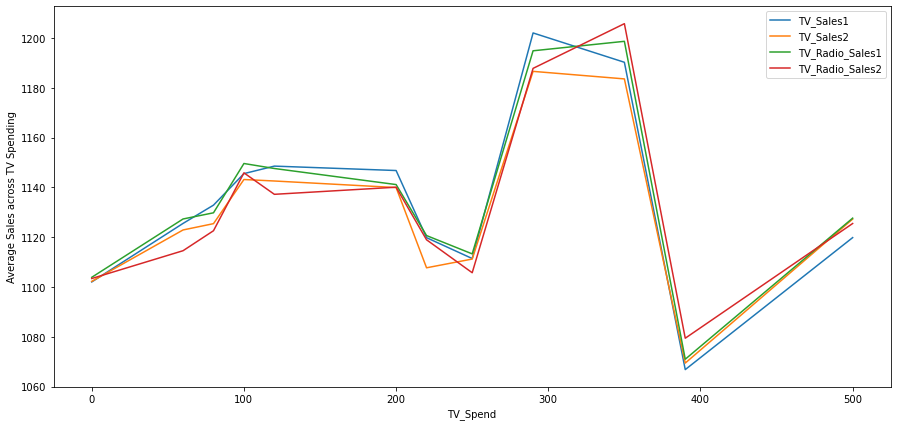

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['TV_Spend']).TV_Sales1.mean().plot(ax=ax)
df.groupby(['TV_Spend']).TV_Sales2.mean().plot(ax=ax)
df.groupby(['TV_Spend']).TV_Radio_Sales1.mean().plot(ax=ax)
df.groupby(['TV_Spend']).TV_Radio_Sales2.mean().plot(ax=ax)

plt.legend()
plt.ylabel('Average Sales across TV Spending')

Text(0, 0.5, 'Sales')

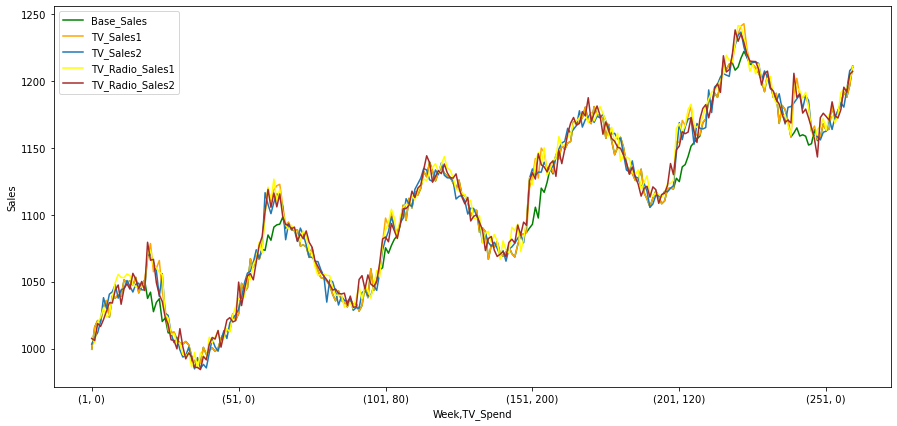

In [40]:
fig, ax = plt.subplots(figsize=(15,7))
#df.groupby(['tvSpend','week']).tvSales1.sum().plot(ax=ax, colors='green')
#df.groupby(['tvSpend','week']).baseSales.sum().plot(ax=ax, colors='yellow')
df.groupby(['Week','TV_Spend']).Base_Sales.sum().plot(ax=ax, color='green')
df.groupby(['Week','TV_Spend']).TV_Sales1.sum().plot(ax=ax, color='orange')
df.groupby(['Week','TV_Spend']).TV_Sales2.sum().plot(ax=ax)
df.groupby(['Week','TV_Spend']).TV_Radio_Sales1.sum().plot(ax=ax, color='yellow')
df.groupby(['Week','TV_Spend']).TV_Radio_Sales2.sum().plot(ax=ax, color='brown')

plt.legend()
plt.ylabel('Sales')

# Marketing Mix Modeling & multi-touch attribution

Market Mix Modeling (MMM) is a technique which helps in quantifying the impact of several marketing inputs on sales or Market Share. The purpose of using MMM is to understand how much each marketing input contributes to sales, and how much to spend on each type of marketing channel.

MMM helps in the ascertaining the effectiveness of each marketing input in terms of Return on Investment. A marketing input with higher return on Investment (ROI) is more effective as a medium than a marketing input with a lower ROI.

MMM uses the Regression technique and the analysis performed through Regression is further used for extracting key insights.


## Multi-touch Attribution

Accurate attribution provides a realistic picture of each channel’s contribution to returns and enables efficiency gains. External factors like seasonality, geography can be modeled within ad-stock for accurate attribution as well as to identify areas of waste and simulate scenarios for optimal budget allocation


## Factor Analysis

If we have more than Advertising routes which was similar, we should do a Factor Analysis to group similar Ad routes 
into categories. For example, if you have various online advertising platforms(social media, email, keywords) and print(journals,newspaper, brochure ads ). 

Since we only have 2 mediums here TV and Radio. We do not need to do this. 

## Multi-Linear Regression

We will use Multi-Linear Regression to model our dependent variable which in our case which will be TVRadio sales.
The independent variables we will use for this are - Temp, Tv Spend, Radio Spend

An equation will be formed between the Dependent & the predictors. This equation could be linear or non-linear depending 
upon the relationship between Sales & Marketing inputs. 

The Equation will be of the form - 

                                          Sales = β0 + β1*X1 + β2*X2 + ...



The Beta coeff generated from the regression analysis for each Independent Variable helps in quantifying the impact of each input. 

### 1. Interpretation

We can interpret the equation using the Beta values from the regression analysis, which depicts that one unit increase in input would increase the Sales by Beta units keeping the other input variables constant. 

### 2. Significance tests 

We can also do Significance tests for the Independent Variables from the Regression Analysis. We can check for P-Value or Z-score to see whether a input is significant for the Dependent variable. Generally, P-Value of < 0.05 accounts for rejection of Null Hypothesis which means that the relationship between Independent variable & Dependent is significant and should be considered for modeling. 

### 3. Interaction Effects

We can also Observe if there are any Joint effects known as Interaction effects of 2 or more interaction variables on at the Dependent variables

### GRP
A gross rating point is a measure of the size of an advertising campaign by a specific medium or schedule

TV Spend or GRP is considered as a non-linear variable because, an advertisement will create awareness among customers to only a certain extent. Beyond a certain point, increased exposure to advertisement would not create any further incremental awareness among customers as they are already aware of the brand.

So to consider TV GRP as one of the modeling inputs, it is transformed into adstock.


## Advertising Adstock

Before the actual marketing mix modeling, we have to take “advertising adstock effect” into account, which “describes the prolonged or lagged effect of advertising on consumer purchase behavior”

Ad-stock quantifies build-up of awareness in the minds of the consumers. It accounts for exposure to advertising and the influence it has on purchase behavior. Each new exposure to an advertisement builds awareness and it will be higher if there have been recent exposures and lower if not. In the absence of further exposures adstock eventually deteriorates to negligible levels.

The key assumption made by the adstock model is that each given sales period retains a fraction of the previous stock of advertising. 


## Adstock Components - 

1. Exposure to advertising today has effects on consumers’ purchasing decisions in the future (Carryover Effect)
2. The effect of ad exposure on purchasing decisions decays with time (Carryover Effect)
3. The effect of ad exposure on sales is subject to the law of diminishing returns (Shape Effect)
4. Changing the level of ad exposure brings about a relative change in sales volumes (Shape Effect)

We will discuss about two main components - 

### Diminishing Returns - 
This states that after the saturation level is reached, the impact of exposure to ads start diminishing over time. 

### Carry Over Effect - 
This is the impact of past advertisement on present sales. It is also called Decay effect as the impact of previous months advertisement decays over time. 

let us denote the intensity of the channel activity measured in dollars spent or the number of messages in time period t as Xt, the business metric of interest, often the sales volume or revenue, as yt, and the current effect induced by the activity on the business metric as at. The effect variable at is called the adstock. The adstock model assumption can then be expressed as

                                 AdStock(time=t) = Xt + λ * (AdStock(time=t-1)
                                 
in which λ is the decay parameter that corresponds to the fraction of the effect carried over the time period

We can fit the adstock model by solving the following problem for the observed samples yt:

                                min Summation(|yt - hat(yt)|^2)
Then we can calculate the Contribution of each input as -

Contribution of X1 = B1 * X1 Spending


## Regression Analysis

The most common marketing mix modeling regression techniques used are:

1. Linear regression

Sales = β0 + β1*X1 + β2*X2 + ...

2. Multiplicative regression (Logarithmic Models)

Ln(Sales) = β0 + β1*(TvSpend) + β2*(RadioSpend)

Calculating the AdStock values from the Amount Spent on each Marketing Input and AdStock Coeff

In [41]:
Sales = df['TV_Radio_Sales1']

In [42]:
XDF = pd.DataFrame()

In [43]:
XDF['TV_AdStock_Values'] = df['TV_Sales1_AdStock']
XDF['Radio_AdStock_Values'] = df['TV_Radio_Sales1_Adstock']

In [48]:
X = XDF

In [70]:
lr_model = smf.ols((Sales,X) , data=df).fit()

In [71]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        TV_Radio_Sales1   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              27.03
Date:                Tue, 14 Nov 2023   Prob (F-statistic):                    2.19e-11
Time:                        19:51:01   Log-Likelihood:                         -2167.6
No. Observations:                 260   AIC:                                      4339.
Df Residuals:                     258   BIC:                                      4346.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
TV_Spend             -1.7170      1.820     -0.944      0.346      -5.300       1.866
TV_AdStock_Values  1519.4374    341.048      4.455      0.000     847.845    2191.030
==============================================================================
Omnibus:                      102.583   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.858
Skew:                          -1.994   Prob(JB):                     3.69e-52
Kurtosis:                       5.443   Cond. No.                         376.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P Value is close to 0 which means the Parameter is Significant but there is MultiColinearity in this method. 
This is why Log Models & Numerical Approximation method is prefered for this task. 

## Sales as a Function of Amount spent on Ads & ADStock

In [72]:
XDF4 = pd.DataFrame()

XDF4['TV_Spend'] = df['TV_Spend']
#XDF4['Radio_Spend'] = df['Radio_Spend']
XDF4['TV_AdStock_Values'] = df['TV_Sales1_AdStock']
#XDF4['TVRadio_AdStock_Values'] = df['TV_Radio_Sales1_Adstock']

X = XDF4
Sales = df['TV_Radio_Sales1']

In [73]:
lr_model3 = smf.ols((Sales,X) , data=df).fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        TV_Radio_Sales1   R-squared (uncentered):                   0.173
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              27.03
Date:                Tue, 14 Nov 2023   Prob (F-statistic):                    2.19e-11
Time:                        19:51:15   Log-Likelihood:                         -2167.6
No. Observations:                 260   AIC:                                      4339.
Df Residuals:                     258   BIC:                                      4346.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
TV_Spend             -1.7170      1.820     -0.944      0.346      -5.300       1.866
TV_AdStock_Values  1519.4374    341.048      4.455      0.000     847.845    2191.030
==============================================================================
Omnibus:                      102.583   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.858
Skew:                          -1.994   Prob(JB):                     3.69e-52
Kurtosis:                       5.443   Cond. No.                         376.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Numerical Approximation Method

In [74]:
import sympy as sy
import numpy as np
from mpmath import *
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
TV_Radio_Sales = df['TV_Radio_Sales1'].to_list()
TV_Radio_Sales

[1008.322089,
 1004.325565,
 1019.312032,
 1023.269288,
 1030.450885,
 1023.482957,
 1025.405121,
 1037.906887,
 1049.281201,
 1055.472868,
 1053.154759,
 1052.937265,
 1055.753044,
 1054.574419,
 1047.517485,
 1046.497979,
 1045.527083,
 1046.201294,
 1046.057214,
 1070.998713,
 1073.550313,
 1062.437267,
 1060.191973,
 1057.188315,
 1055.141079,
 1025.571552,
 1022.871742,
 1010.628742,
 1011.049644,
 1004.313541,
 1003.908719,
 995.5874113,
 994.1701867,
 997.0874453,
 986.2155579,
 996.9184714,
 985.4857781,
 996.7190446,
 993.7148563,
 992.4758744,
 1008.490189,
 1004.244807,
 1008.695544,
 1013.09537,
 1003.413474,
 1007.985434,
 1014.972263,
 1012.218745,
 1024.740561,
 1031.441214,
 1037.480822,
 1035.944716,
 1039.267963,
 1054.183323,
 1051.404757,
 1062.952216,
 1067.157906,
 1079.504723,
 1071.77588,
 1101.806759,
 1120.666536,
 1110.913556,
 1126.666849,
 1110.506585,
 1119.132664,
 1102.608363,
 1092.234815,
 1089.149432,
 1092.189446,
 1088.323536,
 1084.640081,
 1080.17

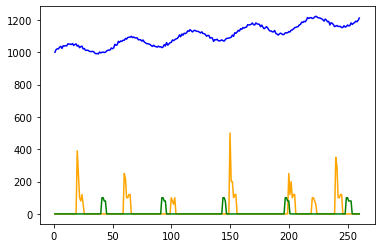

In [76]:
# The input of the model is a sequence of samples (time series) 
# where each sample is represented by three values:
#  - Total revenue
#  - Intensity of campaign 01
#  - Intensity of campaign 02
TV_Radio_Sales = df['Base_Sales'].to_list()
TV_Spend = df['TV_Spend'].to_list()
Radio_Spend = df['Radio_Spend'].to_list()

decay_length = 3
time = range(1, len(TV_Radio_Sales)+1)
plt.plot(time, TV_Radio_Sales, color='blue')
plt.plot(time, TV_Spend, color='orange')
plt.plot(time, Radio_Spend, color='green')

In [77]:
# Adds a time lag (memory effect) to the campaign intensity samples 
def lag(campaing_series, alpha, decay_lenght):
    lag_series = []
    for t in range(1, len(campaing_series)+1):
        lag_series.append( 
            campaing_series[t-1] + 
            nsum(lambda j: alpha**j * campaing_series[int(t-1-j)], [1, min(t, decay_lenght)]) 
        )
    return lag_series

In [78]:
# Apply a time lag to the campaign intensity data, and then 
# define the Adstock model as a linear function of lagged samples.
# The model training objective is to minimize the approximation error
symbols = sy.symbols("b w1 w2 a1 a2")
b, w1, w2, a1, a2 = symbols
TV_lag = sy.Matrix(lag(TV_Spend, a1, decay_length))
Radio_lag = sy.Matrix(lag(Radio_Spend, a2, decay_length))
Sales_model = sy.Matrix([b]*len(time)) + w1*TV_lag + w2*Radio_lag
objective = (sy.Matrix(TV_Radio_Sales) - Sales_model).norm()

In [79]:
Sales_model

Matrix([
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[                                                                      b],
[               

In [80]:
# Adstock model fitting using numerical optimization
objective_n = sy.lambdify(symbols, objective, modules='numpy')
def objective_v(x):
    return objective_n(*tuple(x))

solution = minimize(objective_v, np.zeros(len(symbols)))
bn, w1n, w2n, a1n, a2n = solution.x

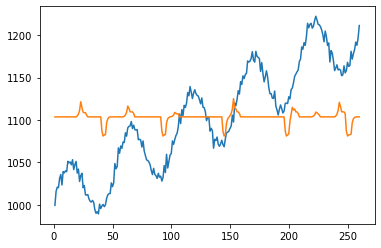

In [81]:
# Plot the difference between the actual revenue data and adstock model
Sales_predicted = sy.lambdify(symbols, Sales_model)
Sales_predicted_series = Sales_predicted(*tuple(solution.x))
plt.plot(time, TV_Radio_Sales, time, Sales_predicted_series);

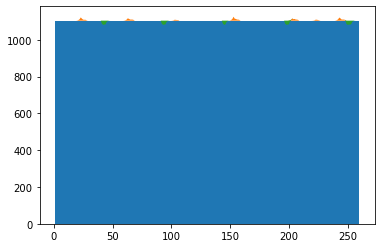

In [82]:
# Evaluate and plot model components that correspond to individual campaigns 
# (i.e. estimate contribution of individual campaigns)
def eval_campaing_lag(campaing_lag, a, aval, w):
    return sy.matrix2numpy(w*campaing_lag.evalf(subs={a:aval}), dtype=float).flatten().tolist()
    
plt.stackplot(time, [ 
    [bn]*len(time), 
    eval_campaing_lag(TV_lag, a1, a1n, w1n),
    eval_campaing_lag(Radio_lag, a2, a2n, w2n)
] )

### SnapShot in Time 

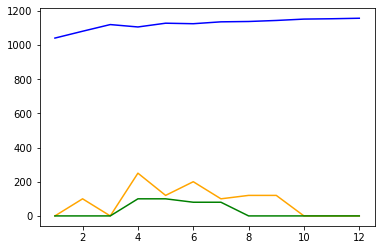

In [83]:
# The input of the model is a sequence of samples (time series) 
# where each sample is represented by three values:
#  - Total revenue
#  - Intensity of campaign 01
#  - Intensity of campaign 02
Sales = [1040, 1080, 1119, 1105, 1127, 1124, 1135, 1137, 1143, 1151, 1153, 1156]
campaign_TV = [0, 100, 0, 250, 120, 200, 100, 120, 120, 0, 0, 0]
campaign_Radio = [0, 0, 0, 100, 100, 80, 80, 0, 0, 0, 0, 0]
decay_length = 3
time = range(1, len(Sales)+1)
plt.plot(time, Sales, color='blue')
plt.plot(time, campaign_TV, color='orange')
plt.plot(time, campaign_Radio, color='green')

In [84]:
# Adds a time lag (memory effect) to the campaign intensity samples 
def lag(campaing_series, alpha, decay_lenght):
    lag_series = []
    for t in range(1, len(campaing_series)+1):
        lag_series.append( 
            campaing_series[t-1] + 
            nsum(lambda j: alpha**j * campaing_series[int(t-1-j)], [1, min(t, decay_lenght)]) 
        )
    return lag_series

In [85]:
# Apply a time lag to the campaign intensity data, and then 
# define the Adstock model as a linear function of lagged samples.
# The model training objective is to minimize the approximation error
symbols = sy.symbols("b w1 w2 a1 a2")
b, w1, w2, a1, a2 = symbols
TV_lag = sy.Matrix(lag(campaign_TV, a1, decay_length))
Radio_lag = sy.Matrix(lag(campaign_Radio, a2, decay_length))
Sales_model = sy.Matrix([b]*len(time)) + w1*TV_lag + w2*Radio_lag
objective = (sy.Matrix(Sales) - Sales_model).norm()

In [86]:
Sales_model

Matrix([
[                                                                                                        b],
[                                                                                             b + 100.0*w1],
[                                                                                       100*a1**1.0*w1 + b],
[                                                                    b + w1*(100*a1**2.0 + 250) + 100.0*w2],
[                                        b + w1*(250*a1**1.0 + 100*a1**3.0 + 120) + w2*(100*a2**1.0 + 100)],
[                           b + w1*(120*a1**1.0 + 250*a1**2.0 + 200) + w2*(100*a2**1.0 + 100*a2**2.0 + 80)],
[b + w1*(200*a1**1.0 + 120*a1**2.0 + 250*a1**3.0 + 100) + w2*(80*a2**1.0 + 100*a2**2.0 + 100*a2**3.0 + 80)],
[      b + w1*(100*a1**1.0 + 200*a1**2.0 + 120*a1**3.0 + 120) + w2*(80*a2**1.0 + 80*a2**2.0 + 100*a2**3.0)],
[                    b + w1*(120*a1**1.0 + 100*a1**2.0 + 200*a1**3.0 + 120) + w2*(80*a2**2.0 + 80*a2**3.0)],
[         

In [87]:
# Adstock model fitting using numerical optimization
objective_n = sy.lambdify(symbols, objective, modules='numpy')
def objective_v(x):
    return objective_n(*tuple(x))

solution = minimize(objective_v, np.zeros(len(symbols)))
bn, w1n, w2n, a1n, a2n = solution.x

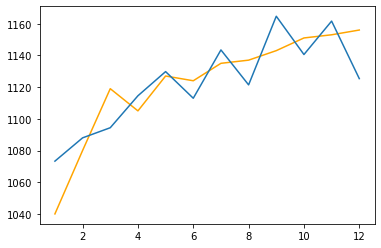

In [88]:
# Plot the difference between the actual revenue data and adstock model
Sales_predicted = sy.lambdify(symbols, Sales_model)
Sales_predicted_series = Sales_predicted(*tuple(solution.x))
plt.plot(time, Sales, color='orange')
plt.plot(time, Sales_predicted_series)

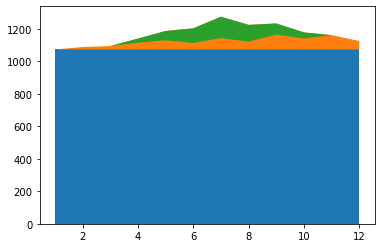

In [89]:
# Evaluate and plot model components that correspond to individual campaigns 
# (i.e. estimate contribution of individual campaigns)
def eval_campaing_lag(campaing_lag, a, aval, w):
    return sy.matrix2numpy(w*campaing_lag.evalf(subs={a:aval}), dtype=float).flatten().tolist()
    
plt.stackplot(time, [ 
    [bn]*len(time), 
    eval_campaing_lag(TV_lag, a1, a1n, w1n),
    eval_campaing_lag(Radio_lag, a2, a2n, w2n)
] )